<a href="https://colab.research.google.com/github/danielrr25/CAP4630_A.I/blob/main/Homework_04%265_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network Homework

This is the 4th assignment for CAP 4630 and we will implement a basic RNN network and an LSTM network with Pytorch to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 60 points, with extra 10 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement a RNN model to predict time series##
### 1.1 Prepare the data (10 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(2.5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(2.5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(2.5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2.5 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**.
2. Set the data types of both train and test data to "float32".
3. Use **past 12** datapoints as input data X to predict the **next 1** datapoint as Y, which is the 'next token prediction'. The time window will be 12.
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Step 1. Use pandas to read training and testing from txt file. (2.5 pts)
train_data = pd.read_csv('train.txt', header=0, usecols=[1], dtype=np.float32)
test_data = pd.read_csv('test.txt', header=0, usecols=[1], dtype=np.float32)


# Step 2. Normalize training and test data into [0, 1]. (2.5 pts)
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform both train and test data
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Step 3. Create a training and test datasets. (2.5 pts)
# Define a function to create datasets
def create_dataset(data, look_back=12):
    dataX, dataY = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Create training and testing datasets
trainX, trainY = create_dataset(train_scaled, look_back=12)
testX, testY = create_dataset(test_scaled, look_back=12)

# Step 4. Print out the shape of data. (2.5 pts)
print("TestX Shape:", testX.shape)
print("TestY Shape:", testY.shape)
print("First 3 samples of TestX:")
for i in range(3):
    print("testX[{}] = {}".format(i, testX[i]))
print("First 3 samples of TestY:")
for i in range(3):
    print("testY[{}] = {}".format(i, testY[i]))

TestX Shape: (17, 12)
TestY Shape: (17,)
First 3 samples of TestX:
testX[0] = [1.0661157  1.1046832  0.8264463  0.70247936 0.5674931  0.64187324
 0.70523417 0.6556474  0.8319559  0.8044077  0.87052345 1.013774  ]
testX[1] = [1.1046832  0.8264463  0.70247936 0.5674931  0.64187324 0.70523417
 0.6556474  0.8319559  0.8044077  0.87052345 1.013774   1.2231405 ]
testX[2] = [0.8264463  0.70247936 0.5674931  0.64187324 0.70523417 0.6556474
 0.8319559  0.8044077  0.87052345 1.013774   1.2231405  1.2534435 ]
First 3 samples of TestY:
testY[0] = 1.2231404781341553
testY[1] = 1.2534434795379639
testY[2] = 0.9889806509017944


### 1.2 - Build the RNN model (20 Points) ##


Build a RNN model with RNN cell.

**Tasks:**
1. Build an RNN model with 1 RNN layer and 1 Linear layer, with RNN's hidden size to be 4.  **(10 Points)**
2. Initialize model, optimizer and criterion. **(5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10** and **print out the average traning loss for every 100 epochs**. **(5 Points)**

**Hints:**  
1. You can use **nn.RNN** to specify RNN cells.
2. Use loss function (criterion) **MSELoss()** and select **Adam** optimizer with **learning_rate=0.005** and other default settings.

In [ ]:
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# Complete the model architecture (10 pts)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
      super(RNN, self).__init__()
      self.hidden_size = hidden_size
      self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
      self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
      # Initialize the hidden state with zeros
      h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
      # Forward pass to propagate the RNN
      out, _ = self.rnn(x, h0)
      # Pass the output of the last time step to the linear layer
      out = self.fc(out[:, -1, :])
      return out

# Create an instance of model, optimizer and criterion. (5 pts)
input_size = 1  # As we are dealing with sequences of individual passenger counts
hidden_size = 4  # Given in the task
output_size = 1  # Predicting one value

# Create an instance of the RNN
model = RNN(input_size, hidden_size, output_size)

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

# Train the RNN Model for 1000 epoch and print out the training loss for every 100 epochs. (5 pts)
# Convert data to PyTorch tensors and then create datasets and data loaders
trainX_tensor = torch.tensor(trainX).unsqueeze(2).to(device)  # Adding an extra dimension for features
trainY_tensor = torch.tensor(trainY).unsqueeze(1).to(device)

# Create datasets and dataloaders
train_dataset = TensorDataset(trainX_tensor, trainY_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# Function to train the model
def train_model(model, criterion, optimizer, num_epochs=1000):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        if (epoch + 1) % 100 == 0:
            avg_loss = running_loss / len(train_loader)
            print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}')

train_model(model, criterion, optimizer)

Epoch 100/1000, Training Loss: 0.0056
Epoch 200/1000, Training Loss: 0.0036
Epoch 300/1000, Training Loss: 0.0051
Epoch 400/1000, Training Loss: 0.0035
Epoch 500/1000, Training Loss: 0.0033
Epoch 600/1000, Training Loss: 0.0030
Epoch 700/1000, Training Loss: 0.0030
Epoch 800/1000, Training Loss: 0.0033
Epoch 900/1000, Training Loss: 0.0024
Epoch 1000/1000, Training Loss: 0.0024


### 1.3 Evaluate Predictive Model Performance (**Bonuse point 10 Points**)

Predict datapoints with the observed datapoints and trained model.

**Tasks:**
1. Make prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Denormalize the prediction results back to original scale with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. The plot for validation is shown below (observation test data are blue and prediction results are orange):
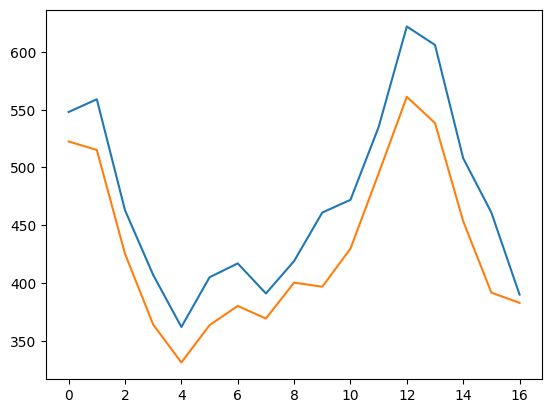

<span style="color:magenta">
    The corresponding figures could be different from the one above, but should be reasonable.**
</span>


Training RMSE: 16.87384605407715
Testing RMSE: 47.39250946044922


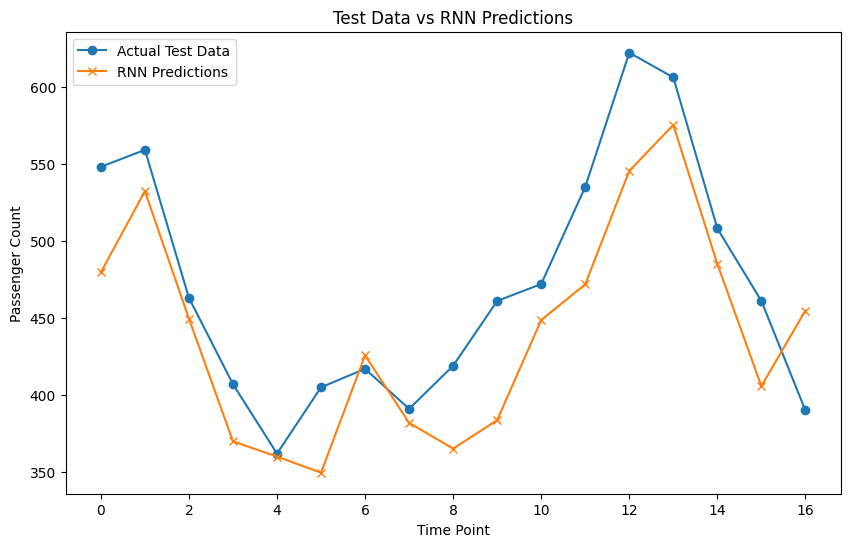

In [ ]:
# Step 1. Inference above model on training and testing data. (2 pts)
model.eval()  # Set the model to evaluation mode

# Inference on training data
train_predictions = model(trainX_tensor).detach().cpu().numpy()
# Inference on testing data
testX_tensor = torch.tensor(testX).unsqueeze(2).to(device)
test_predictions = model(testX_tensor).detach().cpu().numpy()

# Step 2. Denomalization. (3 pts)
train_predictions_denorm = scaler.inverse_transform(train_predictions)
test_predictions_denorm = scaler.inverse_transform(test_predictions)

# Step 3. Calculate root mean squared error for training and testing and print. (3 pts)
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training data
trainY_denorm = scaler.inverse_transform(trainY_tensor.numpy())
train_rmse = mean_squared_error(trainY_denorm, train_predictions_denorm, squared=False)

# Calculate RMSE for testing data
testY_denorm = scaler.inverse_transform(testY.reshape(-1, 1))
test_rmse = mean_squared_error(testY_denorm, test_predictions_denorm, squared=False)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")

# Step 4. Plot the predictions. (2 pts)
import matplotlib.pyplot as plt

# Plot predictions and actual values for test data
plt.figure(figsize=(10, 6))
plt.plot(testY_denorm, label='Actual Test Data', marker='o')
plt.plot(test_predictions_denorm, label='RNN Predictions', marker='x')
plt.title('Test Data vs RNN Predictions')
plt.xlabel('Time Point')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


## 2 - Use LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (10 Points) ###
Conduct sentiment analysis using IMDB data with reccurent neural network. Make prediction on sentiment (positive/negative) as a binary classification.
More details can be found here, https://keras.io/api/datasets/imdb/

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(5 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(5 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here, max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.

**Note:**\
We train the build LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.

In [ ]:
import torch
import random
import numpy as np

from keras.preprocessing import sequence
from keras.datasets import imdb

# Step 1. Load IMDB dataset from keras. (5 pts)
max_features = 1000  # Number of words to consider as features
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Print the lengths of sequences
print("Review lengths (train):", [len(x) for x in x_train[:5]])
print("Review lengths (test):", [len(x) for x in x_test[:5]])

# Step 2. Preprocess the sequences with padding (5 pts)

maxlen = 100  # Pad sequences to this length

# Pad the sequences in the training and testing sets
x_train_padded = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_padded = sequence.pad_sequences(x_test, maxlen=maxlen)

# Now that the sequences are padded, print the shapes of the input sets
print("x_train_padded shape:", x_train_padded.shape)
print("x_test_padded shape:", x_test_padded.shape)


Review lengths (train): [218, 189, 141, 550, 147]
Review lengths (test): [68, 260, 603, 181, 108]
x_train_padded shape: (25000, 100)
x_test_padded shape: (25000, 100)


### 2.2 - Design and train LSTM model (20 Points) ###

Build a LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Linear layer**. The embedding vector is specified with the dimension of **8**. **(10 Points)**
2. Create LSTM model with **Adam** optimizer, **binary_crossentropy** loss function (BCELoss()). **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. You need to use TensorDataset and DataLoader to split the data into batches with batch_size and shuffle the data. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. You need to initialize hidden(h) and cell(c) for the lstm and always use h and c as input to your lstm layer. (For performance)
3. Set **hidden dimension = 8** for LSTM layer.
4. Use only the last layer as the input of linear layer (For performance)
5. Set activation function to **sigmoid** for Linear layer.
6. You may have some trouble with the data dimension, please consider using squeeze or unsqueeze to make two data have the same dimension.
7. Write a constructor with many configurations (number of layers, embedding dimension...) could save you a lot of time for the bonus questions since you can reuse the code here.

In [ ]:
import torch
import torch.nn as nn

# Complete LSTM model architecture. (20 pts)
class LSTMClassifier(nn.Module):
    def __init__(self, max_features, embedding_dim, hidden_dim, num_layers):
        super(LSTMClassifier, self).__init__()
        self.embeddings = nn.Embedding(max_features, embedding_dim)  # Embedding layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)  # LSTM layer
        self.classifier = nn.Linear(hidden_dim, 1)  # Linear layer for classification
        self.sigmoid = nn.Sigmoid()  # Add the sigmoid activation function here

    def forward(self, sentence):
        sentence = self.embeddings(sentence)
        lstm_out, _ = self.lstm(sentence)
        sentence = self.classifier(lstm_out[:, -1, :])  # Take the last output of the LSTM for classification
        sentence = self.sigmoid(sentence)  # Apply sigmoid to output for binary classification
        return sentence

# Create an instance of LSTM model, an adam optimizer and BCE loss. (5 pts)
max_features = 1000  # As specified, the number of words to consider as features
embedding_dim = 8
hidden_dim = 8
num_layers = 1  # Using one LSTM layer

model = LSTMClassifier(max_features, embedding_dim, hidden_dim, num_layers)
model.to(device)

optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.BCELoss()

# Train the model, print out the loss. (5 pts)

from torch.utils.data import TensorDataset, DataLoader

# Prepare the datasets and loaders
train_dataset = TensorDataset(torch.tensor(x_train_padded), torch.tensor(y_train).float().unsqueeze(1))
test_dataset = TensorDataset(torch.tensor(x_test_padded), torch.tensor(y_test).float().unsqueeze(1))

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Train the model
for epoch in range(10):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        # Calculate validation accuracy
        val_correct, val_total = 0, 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            val_correct += (predicted == targets).sum().item()
            val_total += targets.size(0)

    val_accuracy = val_correct / val_total
    print(f'Epoch {epoch + 1}: Validation Accuracy: {val_accuracy:.4f}')

# At the end of training, report the best validation accuracy

# Print out the best validation accuracy. (5 pts)

Epoch 1: Validation Accuracy: 0.5611
Epoch 2: Validation Accuracy: 0.6416
Epoch 3: Validation Accuracy: 0.6818
Epoch 4: Validation Accuracy: 0.7046
Epoch 5: Validation Accuracy: 0.7289
Epoch 6: Validation Accuracy: 0.7466
Epoch 7: Validation Accuracy: 0.7612
Epoch 8: Validation Accuracy: 0.7758
Epoch 9: Validation Accuracy: 0.7878
Epoch 10: Validation Accuracy: 0.7961


# Reinforcement Learning

This is the 5th assignment for CAP 4630 and we will train an AI-based explorer to play a game by reinforcement learing. As domestrated below, in this game, the treasure (denoted by T) is on the right-most and the explorer (denoted by o) will learn to get the treasure by moving left and right. The explorer will be rewarded when it gets the treasure.  After serveral epoches, the explorer will learn how to get the treasure faster and finally it will go to the treasure by moving to right directly. \

You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 60 points, with extra 10 bonus points)** \

Episode 1, Step1: o----T   \
... \
Episode 1, Step6: ---o-T   \
... \
Episode 1, Step10: -o---T \
... \
Episode 1, Step15: ----oT (finished) \

You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)**. Additionally, you have the opportunity to earn **(extra bonus 10 points)** for extra challenges. \

**Task Overview:**
- Train the explorer getting the treasure quickly through Q-learning method

## 1 Achieve Q-learning method ##
### 1.1 Model Preparation **(5 Points)**

Import useful packages and prepare hyperpaprameters for Q-learning methods.

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the library "time"
4. Set the parameter as suggested

**Hints:**
1. For your first trial, you may set as it is
2. You may explore other possibilities here when you complete the whole homework

In [ ]:
#import packages here
import numpy as np
import pandas as pd
import time

N_STATES = 6   # the width of 1-dim world
ACTIONS = ['left', 'right']     # the available actions to use
EPSILON = 0.9   # the degree of greedy (0＜ε＜1)
ALPHA = 0.1     # learning rate (0＜α≤1)
GAMMA = 0.9    # discount factor (0＜γ＜1)
MAX_EPOCHES = 13   # the max epoches
FRESH_TIME = 0.3    # the interval time

# 1.2 Q table **(5 Points)**

Q table is a [states * actions] matrix, which stores Q-value of taking one action in that specific state. For example, the following Q table means in state s3, it is more likely to choose a1 because it's Q-value is 5.31 which is higher than Q-value 2.33 for a0 in s3(refer to Lecture slides 16, page 35).
![](https://drive.google.com/uc?export=view&id=1WGh7NYyYw6ccrxbDVdfbJmb_IhBfUyFf)

**Tasks:**
1. define the build_q_table function
2. **Print Out** defined Q-table. The correct print information should be:

|     | left | right |
|-----|------|-------|
| 0   | 0.0  | 0.0   |
| 1   | 0.0  | 0.0   |
| 2   | 0.0  | 0.0   |
| 3   | 0.0  | 0.0   |
| 4   | 0.0  | 0.0   |
| 5   | 0.0  | 0.0   |


    

**Hints:**
1. Using pd.DataFrame to define the Q-table.(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
2. Initialize the Q-table with all zeros.

In [ ]:
# Define the function to build the Q-table
def build_q_table(n_states, actions):
    table = pd.DataFrame(
        np.zeros((n_states, len(actions))), # Initialize Q-table with zeros
        columns=actions                     # Actions are the column names
    )
    return table

# Create the Q-table for the given states and actions

q_table = build_q_table(N_STATES, ACTIONS)
print(q_table)


   left  right
0   0.0    0.0
1   0.0    0.0
2   0.0    0.0
3   0.0    0.0
4   0.0    0.0
5   0.0    0.0


### 1.3 Define action **(10 Points)**

In this section, we are going to define how an actor picks the actions. We introduce ε-greedy (In lecture slide 16, page 35). In the initial exploring stage, the explorer knows little about the environment. Therefore, it is better to explore randomly instead of greedy. ε-greedy is the value to control the degree of greedy. It can be changed with time lapsing. In this homework, we set it as fixed value EPSILON = 0.9. You can change it to explore the final effect.

**Tasks:**
1. define the choose_action function
2. **Print Out** sample action. The sampled action should be "left" or "right".

**Hints:**
1. You need to define two cases: 1) non-greedy (i.e., random); 2) greedy.
2. Non-greedy should occupy (1-ε) senario while greedy should occupy ε senario. In this case, it means Non-greedy occupys 10% senario while greedy occupys 90% senario. (you could implement it by comparing a random number ranging from 0 to 1 with ε. **Numpy provides a function capable of generating a random number from a uniform distribution.**)
3. In the non-greedy pattern, the actor should choose the actions randomly.
4. In the greedy pattern, the actor should choose the higher Q-value action.
5. Don't forget the initial state which means all Q-value are zero and actor cannot choose greedily. You can treat it as non-greedy pattern.

In [ ]:
#define the function here
# Given state and Q-table, choose action
def choose_action(state, q_table):
     # pick all actions from this state
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):  # non-greedy or non-explored
        action_name = np.random.choice(ACTIONS)
    else:  # greedy
        action_name = state_actions.idxmax()  # Select the action with max Q-value for this state
    return action_name


sample_action = choose_action(0, q_table)
print(sample_action)

right


### 1.4 Interact with the environment **(20 Points)**

In this section, we need to give a feedback for our previous action, which means getting reward (R) for next state (S_next) based on current state (S_current) and action (A). In this problem, we get reward R=1 if we move to the treasure T spot, otherwise, we get R=0.

**Tasks:**
1. define get_env_feedback function
**Hints:**
1. This function contains two parameters S_current and A(ction), and return S_next and R(eward).
2. You need to consider two different senarios: 1) A = right; 2) A = left.
3. In the above two senarios, you need to consider the boundary, next state and rewards.
4. The update_env function is given to show changes for different steps in different episodes.
5. The validation for S_current and Action is shown below.

- S_current=0, sample_action = 'right', sample_feedback=(1,0)
- S_current=3, sample_action = 'right', sample_feedback=(4,0)
- S_current=4, sample_action = 'right', sample_feedback=('terminal', 1)
- S_current=0, sample_action = 'left', sample_feedback=(0,0)
- S_current=3, sample_action = 'left', sample_feedback=(2,0)
- S_current=4, sample_action = 'left', sample_feedback=(3, 0)

In [ ]:
#define the function here
def get_env_feedback(S_current, A):
    # This is how agent will interact with the environment
    if A == 'right':  # move right
        if S_current == N_STATES - 2:  # If the agent is at the right-most position before the treasure
            S_next = 'terminal'
            R = 1  # reward for finding the treasure
        else:
            S_next = S_current + 1
            R = 0  # no reward for a non-terminal move
    else:  # move left
        if S_current == 0:
            S_next = S_current  # remain at the same spot (hit the wall)
            R = 0  # no reward for hitting the wall
        else:
            S_next = S_current - 1
            R = 0  # no reward for a non-terminal move
    return S_next, R

sample_action = 'left'
S_current = 4
sample_feedback = get_env_feedback(S_current, sample_action)
print(sample_feedback)

(3, 0)


In [ ]:
def update_env(S, episode, step_counter):
    # This is how environment be updated
    env_list = ['-'] * (N_STATES - 1) + ['T']  # '-----T' our environment
    if S == 'terminal':
        interaction = 'Episode {}: total steps = {}'.format(episode + 1, step_counter)
        print('\r{}\n'.format(interaction), end='')
        time.sleep(2)
    else:
        env_list[S] = 'o'
        interaction = ''.join(env_list)
        print('\r{}'.format(interaction), end='')
        time.sleep(FRESH_TIME)

### 1.5 Start Q-learning with defined functions **(20 Points)**

In this section, we are going to utilize all the functions defined above to do q-learning based on the optimal policy.
![](https://drive.google.com/uc?export=view&id=10ra6mLlBHlhGNTYWwdGANoa6lC1K_7at)

**Tasks**:
1. define reinforce_learning function

**Hints**:
1. You should write this function with loops to keep updating q-table until you get to the reward spot.
2. We have two loops, one is for different episodes and another one is for steps
3. Whenever we take a step to the reward spot, we should end the loop and start another episode.
4. Here is one possible example.

![](https://drive.google.com/uc?export=view&id=1oo-gk710XVXbbeI7AI0uZInrnKtqGqn7)

In [ ]:
#define the function here
def reinforce_learning():
    # main part of RL loop
    # build Q-table here
    q_table = build_q_table(N_STATES, ACTIONS)

    #start training loop
    for episode in range(MAX_EPOCHES):
        step_counter = 0  #counter for counting steps to reach the treasure
        S_current = 0     #start from S_current
        is_terminated = False   #flag to conrinue or stop the loop
        update_env(S_current, episode, step_counter)   #update environment

        while not is_terminated:
            A = choose_action(S_current, q_table)
            S_next, R = get_env_feedback(S_current, A)
            q_predict = q_table.loc[S_current, A]

            if S_next != 'terminal':                   #if the explorer doesn't get to the treasure
                q_target = R + GAMMA * q_table.iloc[S_next, :].max()   # if next state is not terminal, how can we estimate the q value (hit: bellman equation)?
            else:
                q_target = R     # if next state is terminal, how can we esimate the q value?
                is_terminated = True    # terminate this episode

            q_table.loc[S_current, A] += ALPHA * (q_target - q_predict)  # update Q-table
            S_current = S_next   # move to next state

            update_env(S_current, episode, step_counter+1)
            step_counter += 1
    return q_table


In [ ]:
#main function to run
if __name__ == "__main__":
    q_table = reinforce_learning()
    print('\r\nQ-table:\n')
    print(q_table)

Episode 1: total steps = 50
Episode 2: total steps = 42
Episode 3: total steps = 16
Episode 4: total steps = 10
Episode 5: total steps = 8
Episode 6: total steps = 7
Episode 7: total steps = 5
Episode 8: total steps = 6
Episode 9: total steps = 5
Episode 10: total steps = 7
Episode 11: total steps = 5
Episode 12: total steps = 5
Episode 13: total steps = 5

Q-table:

       left     right
0  0.000014  0.005612
1  0.000003  0.030050
2  0.000981  0.115308
3  0.000000  0.348415
4  0.004236  0.745813
5  0.000000  0.000000


### Bonus Question: Exploring the Impact of Learning Rate and Discount Factor (**10 Bonus Points**)

Dive into the dynamics of reinforcement learning by experimenting with two specific configurations of the learning rate (ALPHA α) and discount factor (GAMMA γ). This focused inquiry will shed light on how different emphases on learning speed versus future reward considerations affect an agent's strategy and efficiency.

**Your Experimental Setups:**
1. **Low Learning Rate, High Discount Factor** (α = 0.1, γ = 0.9): This setting emphasizes cautious learning with a strong consideration for future rewards.
2. **High Learning Rate, Low Discount Factor** (α = 0.9, γ = 0.1): Here, the focus shifts to rapid learning with an emphasis on immediate rewards.

---

#### Task 1: Plotting Steps to Success Over Episodes

**Objective:**  
Create a line graph to visualize the number of steps the agent takes to reach the goal across episodes for two different sets of Q-learning parameters.

**Instructions:**  
1. **Gather Data:** Record the number of steps required for the agent to reach the goal in each episode. Do this for both parameter configurations: α=0.1, γ=0.9 and α=0.9, γ=0.1.
2. **Prepare the Chart:**
   - Label the x-axis as "Episodes" and the y-axis as "Steps to Reach Goal".
   - Choose a plotting tool (e.g., Excel, Google Sheets, Matplotlib, Seaborn).
3. **Plot Lines:**
   - Draw a line for each parameter set (α=0.1, γ=0.9 and α=0.9, γ=0.1), using different colors or styles to distinguish them.
   - Add a legend to identify the lines according to the parameter settings.

**Expected Analysis:**  
Discuss how the number of steps to reach the goal changes over episodes for each parameter setting. Consider what this suggests about the efficiency of learning and adaptation strategies. Note differences in learning speed and consistency.

---

#### Task 2: Analyzing Cumulative Reward Patterns

**Objective:**  
Construct a line graph to illustrate the cumulative reward the agent accumulates over episodes under two different parameter settings: α=0.1, γ=0.9 and α=0.9, γ=0.1.

**Instructions:**  
1. **Gather Data:** Calculate the cumulative reward that the agent earns from the start to the success in each episode. Track this for both parameter configurations: α=0.1, γ=0.9 and α=0.9, γ=0.1.
2. **Prepare the Chart:**
   - Label the x-axis as "Episodes" and the y-axis as "Cumulative Reward".
   - Choose a plotting tool (e.g., Excel, Google Sheets, Matplotlib, Seaborn).
3. **Plot Lines:**
   - Plot a separate line for each parameter configuration, using distinct colors or line styles.
   - Clearly label or add a legend to distinguish between the parameter settings.

**Expected Analysis:**  
Evaluate the patterns in cumulative rewards over episodes for each set of parameters. Discuss the implications of these patterns for the agent's learning process and its ability to maximize rewards. Highlight any notable differences in reward accumulation and learning outcomes between the two parameter sets.


In [ ]:
def reinforce_learning(ALPHA, GAMMA, N_EPISODES):
    q_table = build_q_table(N_STATES, ACTIONS)
    steps_over_episodes = []
    cumulative_rewards = []

    for episode in range(N_EPISODES):
        step_counter = 0
        S_current = 0
        is_terminated = False
        update_env(S_current, episode, step_counter)
        cumulative_reward = 0

        while not is_terminated:
            A = choose_action(S_current, q_table)
            S_next, R = get_env_feedback(S_current, A)
            q_predict = q_table.loc[S_current, A]
            cumulative_reward += R

            if S_next != 'terminal':
                q_target = R + GAMMA * q_table.iloc[S_next, :].max()
            else:
                q_target = R
                is_terminated = True

            q_table.loc[S_current, A] += ALPHA * (q_target - q_predict)
            S_current = S_next
            update_env(S_current, episode, step_counter + 1)
            step_counter += 1

        steps_over_episodes.append(step_counter)
        cumulative_rewards.append(cumulative_reward)

    return q_table, steps_over_episodes, cumulative_rewards

# Run the reinforcement learning with the first set of hyperparameters.
ALPHA_low, GAMMA_high = 0.1, 0.9
q_table_low_alpha, steps_low_alpha, rewards_low_alpha = reinforce_learning(ALPHA_low, GAMMA_high, MAX_EPOCHES)

# Run the reinforcement learning with the second set of hyperparameters.
ALPHA_high, GAMMA_low = 0.9, 0.1
q_table_high_alpha, steps_high_alpha, rewards_high_alpha = reinforce_learning(ALPHA_high, GAMMA_low, MAX_EPOCHES)

# Now you can plot the results, analyze them, and present them as required in the assignment.


Episode 1: total steps = 11
Episode 2: total steps = 13
Episode 3: total steps = 6
Episode 4: total steps = 11
Episode 5: total steps = 6
Episode 6: total steps = 5
Episode 7: total steps = 5
Episode 8: total steps = 5
Episode 9: total steps = 5
Episode 10: total steps = 5
Episode 11: total steps = 5
Episode 12: total steps = 7
Episode 13: total steps = 5
Episode 1: total steps = 45
Episode 2: total steps = 20
Episode 3: total steps = 18
Episode 4: total steps = 6
Episode 5: total steps = 5
Episode 6: total steps = 9
Episode 7: total steps = 5
Episode 8: total steps = 5
Episode 9: total steps = 5
Episode 10: total steps = 5
Episode 11: total steps = 5
Episode 12: total steps = 5
Episode 13: total steps = 5
